# Exercise 2: Data Processing and Analysis

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
try:
    import otter
    grader = otter.Notebook()
except:
    !pip install otter-grader
    import otter
    grader= otter.Notebook()
"""
try:
    from gofer.ok import check 
except:
    %pip install git+https://github.com/grading/gradememaybe.git
    from gofer.ok import check
"""

'\ntry:\n    from gofer.ok import check \nexcept:\n    %pip install git+https://github.com/grading/gradememaybe.git\n    from gofer.ok import check\n'

Today we're working with simulated smartwatch health data. You'll notice when you read in the csv file that we have 7 columns: User ID, Heart Rate (BPM), Blood Oxygen Level (%), Step Count, Sleep Duration (hours), Activity Level, and Stress Level. We're going to go through and "clean up" the data so that we can calculate some basic statistics such as mean, median, minimum, and maximum for each variable. Run the cell below to read in the table saving it in the variable `smartwatch`. 

In [3]:
smartwatch = pd.read_csv("unclean_smartwatch_health_data.csv")
smartwatch

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174.0,58.939776,98.809650,5450.390578,7.167235622316564,Highly Active,1
1,NaN,NaN,98.532195,727.601610,6.538239375570314,Highly_Active,5
2,1860.0,247.803052,97.052954,2826.521994,ERROR,Highly Active,5
3,2294.0,40.000000,96.894213,13797.338044,7.367789630207228,Actve,3
4,2130.0,61.950165,98.583797,15679.067648,NaN,Highly_Active,6
...,...,...,...,...,...,...,...
9995,1524.0,78.819386,98.931927,2948.491953,7.402748595032027,Active,7
9996,4879.0,48.632659,95.773035,4725.623070,6.3821659358529015,Sedentary,2
9997,2624.0,73.834442,97.945874,2571.492060,6.91654920303435,Sedentary,4
9998,4907.0,NaN,98.401058,3364.788855,5.691233932149209,Active,8


Let's start together with the Heart Rate column. Just looking at the preview table above we can see two things right away: (1) we have `NaN` values meaning data was not collected for those individuals, and (2) some of the heart rate values are abnormally high i.e. `247.803052`. Let's see what the entire range of values look like. 

In [4]:
print(smartwatch['Heart Rate (BPM)'].min(), smartwatch['Heart Rate (BPM)'].max())

40.0 296.5939695131042


**Question 1**: Set the variables below equal to the minimum heart rate and the maximum heart rate in the dataset. This is just practice for the method of checking answers as you go. Afterwards run the cell below to check your answer. 

In [5]:
minimumHeartRate = 40.0
maximumHeartRate = 296.5939695131042

In [6]:
grader.check('q1')

Question 1 results: All test cases passed!

Notice that the maximum value of `296` beats per minimute is WAY above normal range of heart rates. In fact, according to [heart.org](https://www.heart.org/en/healthy-living/fitness/fitness-basics/target-heart-rates) the highest estimated heart rate based on age ranges from 150 to 200 for adults. This will vary between individuals, but this is a good starting point for us to think about outliers in the heart rate values in this dataset. Let's see how many rows have missing data or heart rates above 200. 

In [7]:
## select rows where Heart Rate is NaN or rows where the heart rate is above 200. 
# Emphasis on the usage of 'or' here, we want rows where either 
# scenario 1 (NaN) OR scenario 2 (>200) is true. 

outlierHeartRaterows = smartwatch[smartwatch['Heart Rate (BPM)'] > 200] # for those above 200
nullHeartRaterows = smartwatch[smartwatch['Heart Rate (BPM)'].isnull()] #isnull acounts for null values 

len(outlierHeartRaterows) + len(nullHeartRaterows) #adding the lengths of groups over 200 or no value assigned

450

In [8]:
## Now let's get a table of all the other rows. 
heartrateRows = smartwatch[(~smartwatch['Heart Rate (BPM)'].isnull()) & (smartwatch['Heart Rate (BPM)'] <= 200)] ## why do we include the isnull component here?

heartrateRows

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174.0,58.939776,98.809650,5450.390578,7.167235622316564,Highly Active,1
3,2294.0,40.000000,96.894213,13797.338044,7.367789630207228,Actve,3
4,2130.0,61.950165,98.583797,15679.067648,NaN,Highly_Active,6
5,2095.0,96.285938,94.202910,10205.992256,8.378342673824589,Highly_Active,10
6,4772.0,47.272257,95.389760,3208.781177,7.871146008904113,Seddentary,2
...,...,...,...,...,...,...,...
9994,1942.0,77.912299,98.640583,10061.145291,5.428634630125767,Seddentary,10
9995,1524.0,78.819386,98.931927,2948.491953,7.402748595032027,Active,7
9996,4879.0,48.632659,95.773035,4725.623070,6.3821659358529015,Sedentary,2
9997,2624.0,73.834442,97.945874,2571.492060,6.91654920303435,Sedentary,4


**Question 2:** 

Notice here that the length of the two tables (`450` and `9550`) add up to the total number rows (`n=10000`). This is a good sanity check as we manipulate the table. Now we have to decide how we deal with these missing values and outliers. One method to do this would be remove all the rows with null values or outlier values. Another method is use imputation - this can be done in several ways but below we're going to substitute the average heart rate for the missing and mismeasured values. Do we think this will change the mean?

In [9]:
HeartRateMean = heartrateRows['Heart Rate (BPM)'].mean()
print(HeartRateMean)

75.13268404820141


In [10]:
outlierHeartRaterows['Heart Rate (BPM)'] = HeartRateMean
nullHeartRaterows['Heart Rate (BPM)'] = HeartRateMean

outlierHeartRaterows

/tmp/ipykernel_1491/2031948305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlierHeartRaterows['Heart Rate (BPM)'] = HeartRateMean
/tmp/ipykernel_1491/2031948305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nullHeartRaterows['Heart Rate (BPM)'] = HeartRateMean


,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
2,1860.0,75.132684,97.052954,2826.521994,ERROR,Highly Active,5
337,2369.0,75.132684,95.441773,2998.761919,6.670622263019579,Highly Active,9
393,2443.0,75.132684,95.497181,1227.804688,5.185244686595328,Highly_Active,9
403,3200.0,75.132684,96.011492,9402.746140,7.190062873693008,Highly_Active,9
595,2129.0,75.132684,97.161853,2555.402184,5.928628388578222,Highly Active,7
649,2008.0,75.132684,98.356789,2739.171166,7.272009723254014,Highly_Active,NaN
818,3156.0,75.132684,NaN,7281.778831,4.300171191258864,Sedentary,3
1195,3261.0,75.132684,99.652006,2867.872064,7.218530947169898,Active,7
1391,4621.0,75.132684,96.688083,20577.677290,8.049854248644627,Active,3
1602,4737.0,75.132684,95.095839,16072.283561,6.98847026102848,Actve,6


In [11]:
smartwatch_hr = pd.concat([outlierHeartRaterows, nullHeartRaterows, heartrateRows])

fullTableHRMean = float(smartwatch_hr['Heart Rate (BPM)'].mean())
print(bool(fullTableHRMean))

True


In [12]:
grader.check('q2')


Question 2 results:
    Question 2 - 1 result:
        ❌ Test case failed
        Trying:
            bool((HeartRateMean == 75.13268404820141) or (HeartRateMean == np.float64(75.13268404820141)))
        Expecting:
            True
        ok
        Trying:
            HeartRateMean == fullTableHRMean
        Expecting:
            True
        **********************************************************************
        Line 5, in Question 2 0
        Failed example:
            HeartRateMean == fullTableHRMean
        Expected:
            True
        Got:
            np.True_

Notice how the mean doesn't change when you use the imputed mean as the substituted values. However, as a note this will change the distribution of values and has the potential to obscure the causes of missing values or outliers. 

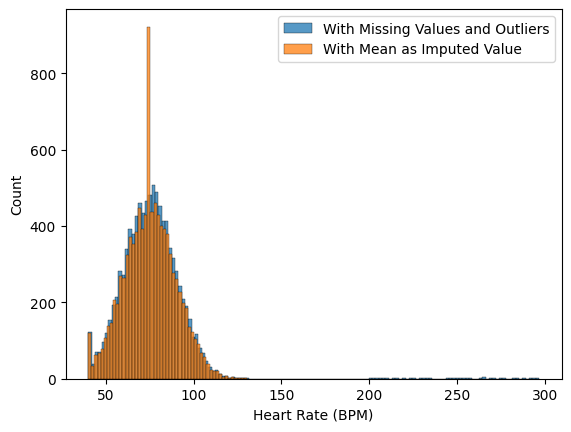

In [13]:
sns.histplot(smartwatch['Heart Rate (BPM)'], label ='With Missing Values and Outliers')
sns.histplot(smartwatch_hr['Heart Rate (BPM)'], label = 'With Mean as Imputed Value')
plt.legend()

**Question 3**: How does the imputation method affect the median values?  Remember the table `smartwatch` remains unchanged and can be used to find the original median value. 

ANSWER: 

The imputation method decreases the median value by ~0.1 

In [52]:
## coding cell to check the difference in median values 

imputedhrmean= smartwatch_hr['Heart Rate (BPM)'].median()
outhrmean= smartwatch['Heart Rate (BPM)'].median()

print(imputedhrmean)
print(outhrmean)

75.13268404820141
75.22060125775644


Now let's repeat this process for the other columns as well. 

**Question 4**: Find the minimum, maximum, and mean Blood Oxygen Level. 

In [15]:
minBloodO2 = smartwatch['Blood Oxygen Level (%)'].min()

maxBloodO2 = smartwatch['Blood Oxygen Level (%)'].max()

meanBloodO2 = smartwatch['Blood Oxygen Level (%)'].mean()

minBloodO2, maxBloodO2, meanBloodO2

(np.float64(90.79120814564097),
 np.float64(100.0),
 np.float64(97.84158102099076))

In [16]:
grader.check('q4')

Question 4 results: All test cases passed!

We can do some visualizations using a box plot to better decide if there's any outliers we'd like to remove. Maybe you decide that everything below 92.5 is an outlier should be removed or maybe you decide to keep all of the values or maybe you decide to remove all values under 94% since that falls outside of a normal, healthy range according to doctors (I would not suggest this last one as it would obscure quite a bit of data! But some analysts might consider it!). In question 5, you can make that decision and justify your answer. 

<Axes: ylabel='Blood Oxygen Level (%)'>

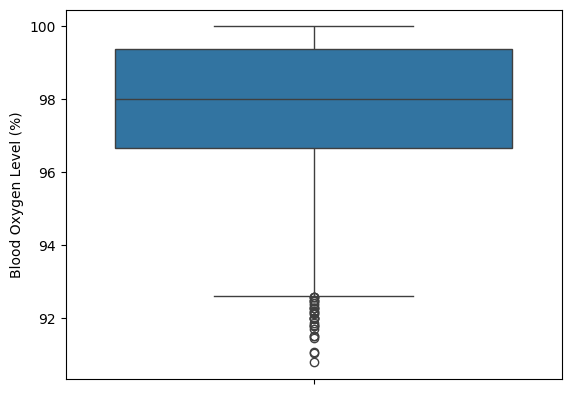

In [17]:
sns.boxplot(smartwatch['Blood Oxygen Level (%)'])

**Question 5**: Decide how you want to deal with missing and outlier values in the Blood Oxygen Level column. Set your final table equal to the variable `smartwatch_o2`. Use the space below to explain your decisions. 

Notes: Refer to [this article](https://pmc.ncbi.nlm.nih.gov/articles/PMC5548942/) on methods of handling these type of instances in data. Keep in mind, you might find that either there are no missing values or no outliers. That's okay, just indicate that in the written space below and update the table i.e. `smartwatch_o2 = smartwatch_hr`

ANSWER: 

....

In [18]:
## use this space or additional cells to deal with the missing/outlier values. 
meanBloodO2 = smartwatch_hr['Blood Oxygen Level (%)'].mean()


nullo2rows = smartwatch_hr[smartwatch_hr['Blood Oxygen Level (%)'].isnull()] ##isnull acounts for null values 
outliero2rows= smartwatch_hr[smartwatch_hr['Blood Oxygen Level (%)'] <= 92.5]

nullo2rows['Blood Oxygen Level (%)'] = meanBloodO2
outliero2rows['Blood Oxygen Level (%)'] = meanBloodO2

normo2rows = smartwatch_hr[(~smartwatch_hr['Blood Oxygen Level (%)'].isnull()) & (smartwatch_hr['Blood Oxygen Level (%)'] > 92.5)]

smartwatch_o2 = pd.concat([nullo2rows,outliero2rows,normo2rows])

smartwatch_o2


/tmp/ipykernel_1491/3256697407.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nullo2rows['Blood Oxygen Level (%)'] = meanBloodO2
/tmp/ipykernel_1491/3256697407.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliero2rows['Blood Oxygen Level (%)'] = meanBloodO2


,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
818,3156.0,75.132684,97.841581,7281.778831,4.300171191258864,Sedentary,3
8369,2283.0,75.132684,97.841581,21495.639335,5.291653956497481,Highly_Active,2
1615,1417.0,75.132684,97.841581,1585.892722,5.850088362685106,Seddentary,9
1712,4079.0,75.132684,97.841581,19003.921284,5.612504092265231,Active,2
4690,2829.0,75.132684,97.841581,6610.794796,7.770459211576647,NaN,9
...,...,...,...,...,...,...,...
9994,1942.0,77.912299,98.640583,10061.145291,5.428634630125767,Seddentary,10
9995,1524.0,78.819386,98.931927,2948.491953,7.402748595032027,Active,7
9996,4879.0,48.632659,95.773035,4725.623070,6.3821659358529015,Sedentary,2
9997,2624.0,73.834442,97.945874,2571.492060,6.91654920303435,Sedentary,4


Moving onto the Step Count column. 

**Question 6**: Find the minimum, maximum, and mean step counts. 

In [19]:
minSteps = smartwatch['Step Count'].min()

maxSteps = smartwatch['Step Count'].max()

meanSteps = smartwatch['Step Count'].mean()

minSteps, maxSteps, meanSteps

(np.float64(0.9101380609604088),
 np.float64(62486.690753464914),
 np.float64(6985.685884992229))

In [20]:
grader.check('q6')

Question 6 results: All test cases passed!

**Question 7**: Decide how you want to deal with missing and outlier values in the Steps column. Set your final table equal to the variable `smartwatch_steps`. Use the space below to explain your decisions. 

Notes: Refer to [this article](https://pmc.ncbi.nlm.nih.gov/articles/PMC5548942/) on methods of handling these type of instances in data. Keep in mind, you might find that either there are no missing values or no outliers. That's okay, just indicate that in the written space below and update the table i.e. `smartwatch_steps = smartwatch_o2`

ANSWER: 

....

<Axes: ylabel='Step Count'>

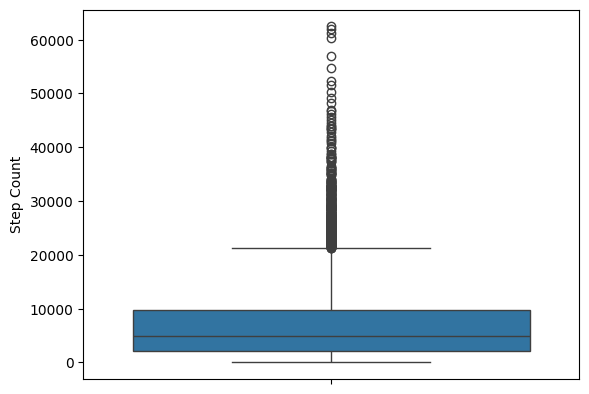

In [21]:
sns.boxplot(smartwatch['Step Count'])

In [22]:
## use this space or additional cells to address the missing or outlier data. 

# Google: Average amount of steps per day: 3,000 - 4,000 - https://www.mayoclinic.org/healthy-lifestyle/fitness/in-depth/10000-steps/art-20317391
outlier_steps = smartwatch_o2[(smartwatch_o2['Step Count'] < 3000) | (smartwatch_o2['Step Count'] > 20000)]
smartwatch_steps = smartwatch_o2[smartwatch_o2['Step Count'].notnull() & ((smartwatch_o2['Step Count'] > 3000) | (smartwatch_o2['Step Count'] < 20000))]
smartwatch_steps

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
818,3156.0,75.132684,97.841581,7281.778831,4.300171191258864,Sedentary,3
8369,2283.0,75.132684,97.841581,21495.639335,5.291653956497481,Highly_Active,2
1615,1417.0,75.132684,97.841581,1585.892722,5.850088362685106,Seddentary,9
1712,4079.0,75.132684,97.841581,19003.921284,5.612504092265231,Active,2
4690,2829.0,75.132684,97.841581,6610.794796,7.770459211576647,NaN,9
...,...,...,...,...,...,...,...
9994,1942.0,77.912299,98.640583,10061.145291,5.428634630125767,Seddentary,10
9995,1524.0,78.819386,98.931927,2948.491953,7.402748595032027,Active,7
9996,4879.0,48.632659,95.773035,4725.623070,6.3821659358529015,Sedentary,2
9997,2624.0,73.834442,97.945874,2571.492060,6.91654920303435,Sedentary,4


Next onto the Sleep Duration column. 

**Question 8**: Try finding the minimum number of hours slept among participants. 

In [23]:
minSleep = smartwatch['Sleep Duration (hours)'].min()

minSleep

TypeError: '<=' not supported between instances of 'str' and 'float'

In the error message, you should see the phrase: 

`TypeError: '<=' not supported between instances of 'str' and 'float'`

This means that the column is a combination of multiple data types. If you recall, we discussed computer readable data that columns HAVE to contain just a single data type. Having a combination of strings, characters, and numbers in a column will only cause more issues downstream. Let's try to figure out all the instances of non-numerical values in the column. 

First let's try to identify all the non-numerical values to make sure removing them doesn't obscure any important information. 

In [25]:
for i in smartwatch['Sleep Duration (hours)'].unique():  ## Loop through each unique item in the column
    try:
        numericVal = float(i)  ## first try to see if it can be converted to a number
    except:
        print(i)  ## if it can't be converted print it to screen 

ERROR


So, we find that the only non-numerical value is the string `ERROR`. We can fix this in two ways. First let's try fixing it by splitting the tables like we've done previously. 

In [26]:
errorTable = smartwatch_steps[smartwatch_steps['Sleep Duration (hours)'] == 'ERROR']
errorTable

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
711,2066.0,64.843081,97.841581,12722.224091,ERROR,Seddentary,7
1245,1484.0,91.329653,97.841581,522.951192,ERROR,Sedentary,7
1335,1193.0,57.231545,97.841581,2184.899471,ERROR,Highly_Active,5
4500,2800.0,72.615444,97.841581,5667.748281,ERROR,Sedentary,6
6035,4721.0,56.758561,97.841581,430.504664,ERROR,Seddentary,4
...,...,...,...,...,...,...,...
9901,2269.0,63.369107,96.229029,6656.786482,ERROR,Active,4
9912,2074.0,75.933666,97.386073,1813.072248,ERROR,Sedentary,10
9927,3007.0,87.579045,98.768633,3727.161872,ERROR,Active,1
9943,2961.0,91.834863,96.145378,38831.465057,ERROR,Active,4


Observe that we've created a table with the rows with `ERROR` in the sleep duration column. We can now replace with the `ERROR` value with our handy NaN value for doing numerical statistics. 

In [27]:
errorTable['Sleep Duration (hours)'] = np.nan

errorTable

/tmp/ipykernel_1491/2302362292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errorTable['Sleep Duration (hours)'] = np.nan


,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
711,2066.0,64.843081,97.841581,12722.224091,NaN,Seddentary,7
1245,1484.0,91.329653,97.841581,522.951192,NaN,Sedentary,7
1335,1193.0,57.231545,97.841581,2184.899471,NaN,Highly_Active,5
4500,2800.0,72.615444,97.841581,5667.748281,NaN,Sedentary,6
6035,4721.0,56.758561,97.841581,430.504664,NaN,Seddentary,4
...,...,...,...,...,...,...,...
9901,2269.0,63.369107,96.229029,6656.786482,NaN,Active,4
9912,2074.0,75.933666,97.386073,1813.072248,NaN,Sedentary,10
9927,3007.0,87.579045,98.768633,3727.161872,NaN,Active,1
9943,2961.0,91.834863,96.145378,38831.465057,NaN,Active,4


Now we could go through and put the tables back together, but another method to do this is to use a built-in function to pandas called `pd.to_numeric()`. Let's try that. 

In [28]:
## create a copy of the table 
smartwatch_sleep = smartwatch_steps

smartwatch_sleep['Sleep Duration (hours)'] = pd.to_numeric(smartwatch_sleep['Sleep Duration (hours)'], errors='coerce')

smartwatch_sleep

/tmp/ipykernel_1491/1089028424.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smartwatch_sleep['Sleep Duration (hours)'] = pd.to_numeric(smartwatch_sleep['Sleep Duration (hours)'], errors='coerce')


,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
818,3156.0,75.132684,97.841581,7281.778831,4.300171,Sedentary,3
8369,2283.0,75.132684,97.841581,21495.639335,5.291654,Highly_Active,2
1615,1417.0,75.132684,97.841581,1585.892722,5.850088,Seddentary,9
1712,4079.0,75.132684,97.841581,19003.921284,5.612504,Active,2
4690,2829.0,75.132684,97.841581,6610.794796,7.770459,NaN,9
...,...,...,...,...,...,...,...
9994,1942.0,77.912299,98.640583,10061.145291,5.428635,Seddentary,10
9995,1524.0,78.819386,98.931927,2948.491953,7.402749,Active,7
9996,4879.0,48.632659,95.773035,4725.623070,6.382166,Sedentary,2
9997,2624.0,73.834442,97.945874,2571.492060,6.916549,Sedentary,4


Now we can finish **Question 8** and find the minimum, maximum, and mean of the sleep duration column. 

In [29]:
smartwatch['Sleep Duration (hours)'] = pd.to_numeric(smartwatch['Sleep Duration (hours)'], errors='coerce')

minSleep = smartwatch['Sleep Duration (hours)'].min()

maxSleep = smartwatch['Sleep Duration (hours)'].max()

meanSleep = smartwatch['Sleep Duration (hours)'].mean()

minSleep, maxSleep, meanSleep

(np.float64(-0.1944527906201543),
 np.float64(12.140232872862926),
 np.float64(6.505462918406444))

In [30]:
grader.check('q8')

Question 8 results: All test cases passed!

**Question 9**: Decide how you want to deal with missing and outlier values in the sleep column. Set your final table equal to the variable `smartwatch_updated_sleep`. Use the space below to explain your decisions. 

*Remember to start with the `smartwatch_sleep` table that we just created.*

Notes: Refer to [this article](https://pmc.ncbi.nlm.nih.gov/articles/PMC5548942/) on methods of handling these type of instances in data. Keep in mind, you might find that either there are no missing values or no outliers. That's okay, just indicate that in the written space below and update the table i.e. `smartwatch_updated_sleep = smartwatch_sleep`

ANSWER: 

....

<Axes: ylabel='Sleep Duration (hours)'>

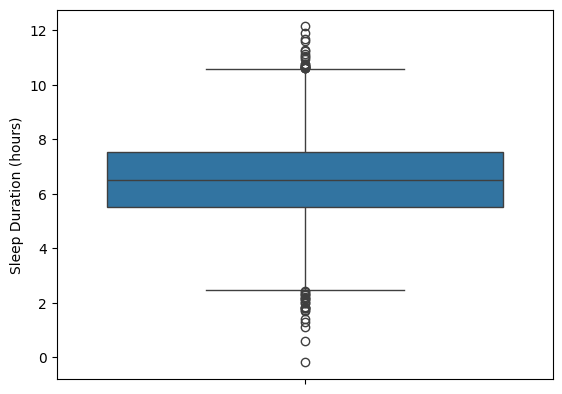

In [31]:
sns.boxplot(smartwatch_sleep['Sleep Duration (hours)'])

In [32]:
outlierSleep = smartwatch_sleep[smartwatch_sleep['Sleep Duration (hours)'] >10.5] 
nullSleep = smartwatch_sleep[smartwatch_sleep['Sleep Duration (hours)'].isnull()]

outlierSleep['Sleep Duration (hours)'] = meanSleep
nullSleep['Sleep Duration (hours)'] = meanSleep
normSleep = smartwatch_sleep[(~smartwatch_sleep['Sleep Duration (hours)'].isnull()) & (smartwatch_sleep['Sleep Duration (hours)'] <10.5)]


# Concatenate the normal and updated rows (with filled NaN values)
smartwatch_updated_sleep = pd.concat([normSleep, nullSleep, outlierSleep])
smartwatch_updated_sleep

/tmp/ipykernel_1491/3931886417.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlierSleep['Sleep Duration (hours)'] = meanSleep
/tmp/ipykernel_1491/3931886417.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nullSleep['Sleep Duration (hours)'] = meanSleep


,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
818,3156.0,75.132684,97.841581,7281.778831,4.300171,Sedentary,3
8369,2283.0,75.132684,97.841581,21495.639335,5.291654,Highly_Active,2
1615,1417.0,75.132684,97.841581,1585.892722,5.850088,Seddentary,9
1712,4079.0,75.132684,97.841581,19003.921284,5.612504,Active,2
4690,2829.0,75.132684,97.841581,6610.794796,7.770459,NaN,9
...,...,...,...,...,...,...,...
7332,2494.0,71.662007,97.370487,12572.997346,6.505463,Active,9
7653,1958.0,50.827758,98.787894,6236.209672,6.505463,Active,NaN
9105,4810.0,102.184124,96.217257,7511.948052,6.505463,Highly Active,8
9293,3809.0,74.661369,100.000000,10836.505727,6.505463,Active,1


We're going to skip the `Activity Level` column for a minute and look at the `Stress Level` column. If we try getting the minimum, we'll find the same error as in the Sleep column where we have mixed data types (strings and numerical values). Let's use the same type of loop to make sure we don't obscure any data by forcing the strings to NaN values. 

In [33]:
for item in smartwatch_updated_sleep['Stress Level'].unique():
    try:
        int(item)
    except:
        print(item)

Very High
nan


**Question 10**: 

What might you decide to do to deal with the `Very High` value? 

Go ahead and do so below and give a brief case for doing so here. Assign your table to the variable `smartwatch_stress`. 

ANSWER: 
Someone with a very high stress level likely sees themselves at the higher or highest end of the scale, therefore I am assigning them one point below the highest numerical value. If they had perhaps said the most streased or unbearably high, I may have put that at a 10. 

In [34]:
## cell to deal with 'Very High' value
##sns.boxplot(smartwatch['Stress Level'])

smartwatch_stress = smartwatch_updated_sleep

smartwatch_stress["Stress Level"] = smartwatch['Stress Level'].replace('Very High', 10)


smartwatch_stress


,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
818,3156.0,75.132684,97.841581,7281.778831,4.300171,Sedentary,3
8369,2283.0,75.132684,97.841581,21495.639335,5.291654,Highly_Active,2
1615,1417.0,75.132684,97.841581,1585.892722,5.850088,Seddentary,9
1712,4079.0,75.132684,97.841581,19003.921284,5.612504,Active,2
4690,2829.0,75.132684,97.841581,6610.794796,7.770459,NaN,9
...,...,...,...,...,...,...,...
7332,2494.0,71.662007,97.370487,12572.997346,6.505463,Active,9
7653,1958.0,50.827758,98.787894,6236.209672,6.505463,Active,NaN
9105,4810.0,102.184124,96.217257,7511.948052,6.505463,Highly Active,8
9293,3809.0,74.661369,100.000000,10836.505727,6.505463,Active,1


Finally, let's go back to the `Activity Level` column and investigate what types of values we find there. 

In [35]:
smartwatch['Activity Level'].unique()

array(['Highly Active', 'Highly_Active', 'Actve', 'Seddentary',
       'Sedentary', 'Active', nan], dtype=object)

**Question 12**: 

What do you notice? There are several values that could and should be combined because they represent the same information. Let's go ahead and do that. While combining these columns, let's also create a new column `NumActivity` where we give a numerical value to represent the activity level. Assign your final table to the variable `final_table`. 

`Highly Active` = `1`

`Active` = `2`

`Sedentary` = `3`



In [36]:
## Highly Active 
highlyActive = smartwatch_stress[(smartwatch_stress['Activity Level'] == 'Highly_Active') | (smartwatch_stress['Activity Level'] == 'Highly Active')]  ## Pull out rows for two unique values matching highly active
##highlyActive['Activity Level'] = (smartwatch_stress['Activity Level'] == 'Highly Active')  ## Reset the text in the column to either 'Highly Active'
highlyActive['Activity Level'] = 'Highly Active'
highlyActive['NumActivity'] = 1

## Active
active = smartwatch_stress[(smartwatch_stress['Activity Level'] == 'Actve') | (smartwatch_stress['Activity Level'] == 'Active')]  ## Pull out rows for two unique values matching active
## active['Activity Level'] = (smartwatch_stress['Activity Level'] == 'Active')  ## Reset the text
active['Activity Level'] = 'Active'
active['NumActivity'] = 2


## Sedentary 
sedentary = smartwatch_stress[(smartwatch_stress['Activity Level'] == 'Seddentary') | (smartwatch_stress['Activity Level'] == 'Sedentary')]  ## Pull out rows for two unique values matching active
## active['Activity Level'] = (smartwatch_stress['Activity Level'] == 'Sedentary')  ## Reset the text
active['Activity Level'] = 'Sedentary'
active['NumActivity'] = 3



final_table = pd.concat([highlyActive, active, sedentary, smartwatch_stress[smartwatch_stress['Activity Level'].isnull()]])
final_table

/tmp/ipykernel_1491/2588133199.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highlyActive['Activity Level'] = 'Highly Active'
/tmp/ipykernel_1491/2588133199.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highlyActive['NumActivity'] = 1
/tmp/ipykernel_1491/2588133199.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level,NumActivity
8369,2283.0,75.132684,97.841581,21495.639335,5.291654,Highly Active,2,1.0
4788,2627.0,75.132684,97.841581,933.511954,7.606071,Highly Active,1,1.0
7809,4195.0,75.132684,97.841581,15307.355450,6.408760,Highly Active,6,1.0
252,1709.0,77.099211,97.841581,3465.970911,1.108614,Highly Active,9,1.0
541,3701.0,77.740697,97.841581,495.871855,8.445701,Highly Active,9,1.0
...,...,...,...,...,...,...,...,...
4069,2577.0,65.201322,99.484801,2240.504798,6.505463,NaN,1,NaN
4596,3501.0,76.063875,96.130100,12510.840514,6.505463,NaN,7,NaN
8059,3895.0,78.398919,100.000000,2522.668511,6.505463,NaN,1,NaN
2137,3265.0,79.173895,100.000000,1492.374172,6.505463,NaN,1,NaN


Let's check to make sure that we no longer have any missing values in each column (besides the Activity Level/NumActivity, Stress Level, and User ID columns). You likely either removed those rows or imputed a value to substitute the missing values. 

In [37]:
final_table.isnull().sum()

User ID                    199
Heart Rate (BPM)             0
Blood Oxygen Level (%)       0
Step Count                   0
Sleep Duration (hours)       0
Activity Level             199
Stress Level               200
NumActivity               3493
dtype: int64

Then let's use the info function to make sure each column has the data type we're expecting. 

In [38]:
final_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9900 entries, 8369 to 2400
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User ID                 9701 non-null   float64
 1   Heart Rate (BPM)        9900 non-null   float64
 2   Blood Oxygen Level (%)  9900 non-null   float64
 3   Step Count              9900 non-null   float64
 4   Sleep Duration (hours)  9900 non-null   float64
 5   Activity Level          9701 non-null   object 
 6   Stress Level            9700 non-null   object 
 7   NumActivity             6407 non-null   float64
dtypes: float64(6), object(2)
memory usage: 696.1+ KB


**Question 13**: 

Let's visualize two of the variables. Let's pick `Heart Rate (BPM)` and then you can select any other numerical variable. We're going to create a scatter plot using matplotlib.pyplot. Example code is: 

`plt.scatter(x, y)` where x and y are your columns of data such as df['label']

Also try including a size parameter to make your points smaller to better see patterns. We'll talk more about creating figures in python in a few weeks, but for now let's just look at the broad patterns. 

Example of including size parameter: 

`plt.scatter(x, y, s=1)` Try changing the `s` parameter to 10, 1, 0.5, and 0.1. 

What do you notice?

ANSWER:

For the variables of 'Heart Rate (BPM)' and 'Blood Oxygen Level (%)' there appears to be a cross pattern in the center of both dataframes created by the high density of data points in that position. By replacign the urplus of Nan values in both columns with the mean value this has created a high density of data points across the y = 97.84 and x= 75.6

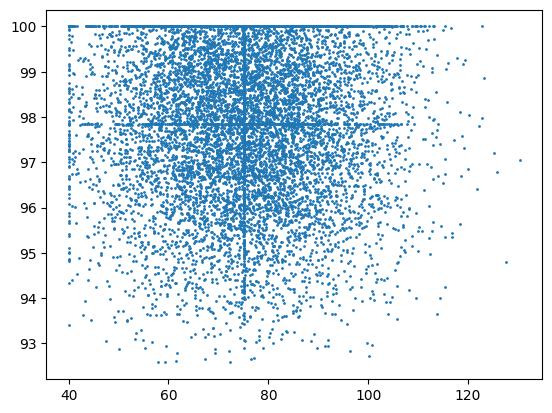

In [67]:
plt.scatter(final_table['Heart Rate (BPM)'], final_table['Blood Oxygen Level (%)'],s=1)

**Question 14**: 


Read in the CSV table where we kept all the NaN values instead of removing or imputing them. Repeat the exact same visualization as above with this data. 

Compare the two figures. What do you notice?

ANSWER:

The cross created by the imputed mean method in the previous final table fisual doesnt exist. The nanTable appreats to have a denser dispursal of data points in this median region where the vross would exist. Additionally the scale of the nan cvalues visual is different starting at 91 on the y axis not 92 in order to include the surplus of outlier values. 

In [40]:
nanTable = pd.read_csv('smartwatch_nan_vals.csv')

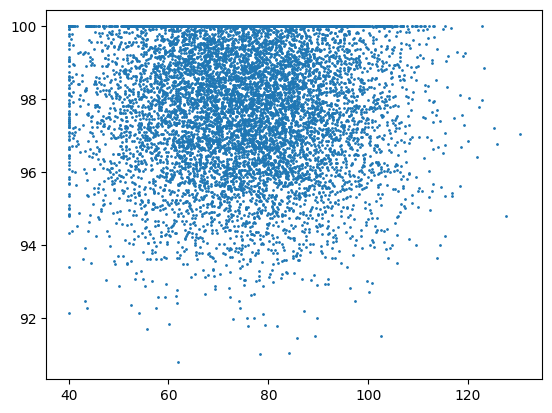

In [65]:
plt.scatter(nanTable['Heart Rate (BPM)'], nanTable['Blood Oxygen Level (%)'], s=1)

**Question 15**: 


Does the amount of steps signficantly differ between the different activity level groups? 

Hint: Try using a boxplot (`sns.boxplot`) to first visualize the problem. Then you can use scipy.stats to run an ANOVA. 

<Axes: xlabel='Activity Level', ylabel='Step Count'>

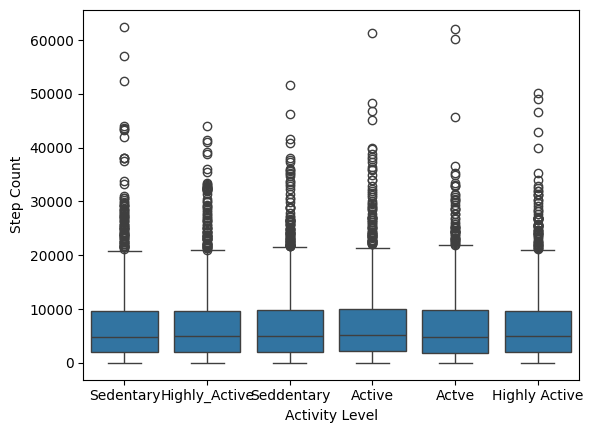

In [64]:
## Visualization 

sns.boxplot(data= smartwatch_stress, x='Activity Level', y='Step Count')
#sns.bo

In [63]:
from scipy.stats import f_oneway

## create a table for each activity level group
sed =  sedentary
act = active ## active rows
hact = highlyActive ## highly active rows 

stat, pval = f_oneway(sed['Step Count'], act['Step Count'], hact['Step Count'])


print(f"ANOVA test statistic: {stat:.3f}, p-value: {pval:.3f}")


ANOVA test statistic: 0.154, p-value: 0.857


Is there significant difference between the groups' step counts?  

ANSWER:

Based on the scatter plot and the large p-value there really is not enough evidence to suggest that different activity group levels have different step counts. 

**Question 16**

If you were to present your findings from this dataset to a broader audience (such as policymakers, healthcare providers, or the general public), how would you communicate key insights responsibly? What considerations would you take into account to avoid misrepresenting the data or reinforcing biases?

ANSWER:

To esure I am communicating the key insights responsibly, I would be transperent about the methods which I cleaned the data. I would make it clear that in exchange from null and outlier values I usued the mean for many of the groups therefore overrepresenting the amount of people that belong in the mean, and also eliminating possible patterns in the outliers or why there are so many missing values in some of the groups. Additionally the data feminism chapters have briefly touched ont he importance of how data is visualized which makes me believe that, similar to quesiton 13 it may be useful to show visualizations of the final table before and ater cleanign for all the columns, just to show hoe large of an impact it could have when drawign conclusions. 